<a href="https://colab.research.google.com/github/vinismachadoo/otimizacao-petroleo-offshore/blob/main/producao_bacia_campos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas -q

     |████████████████████████████████| 972kB 5.8MB/s 
     |████████████████████████████████| 14.8MB 310kB/s 
     |████████████████████████████████| 6.5MB 47.5MB/s 


In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!wget 'http://hmlapp5.anp.gov.br/geoserver/oracleworskspace/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=oracleworskspace:CAMPOS_PRODUCAO_SIRGAS&maxFeatures=500&outputFormat=SHAPE-ZIP'
!unzip 'ows?service=WFS&version=1.0.0&request=GetFeature&typeName=oracleworskspace:CAMPOS_PRODUCAO_SIRGAS&maxFeatures=500&outputFormat=SHAPE-ZIP'

--2020-11-21 16:26:17--  http://hmlapp5.anp.gov.br/geoserver/oracleworskspace/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=oracleworskspace:CAMPOS_PRODUCAO_SIRGAS&maxFeatures=500&outputFormat=SHAPE-ZIP
Resolving hmlapp5.anp.gov.br (hmlapp5.anp.gov.br)... 200.186.194.21
Connecting to hmlapp5.anp.gov.br (hmlapp5.anp.gov.br)|200.186.194.21|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘ows?service=WFS&version=1.0.0&request=GetFeature&typeName=oracleworskspace:CAMPOS_PRODUCAO_SIRGAS&maxFeatures=500&outputFormat=SHAPE-ZIP’

ows?service=WFS&ver     [             <=>    ] 505.56K   145KB/s    in 3.5s    

2020-11-21 16:26:22 (145 KB/s) - ‘ows?service=WFS&version=1.0.0&request=GetFeature&typeName=oracleworskspace:CAMPOS_PRODUCAO_SIRGAS&maxFeatures=500&outputFormat=SHAPE-ZIP’ saved [517693]

Archive:  ows?service=WFS&version=1.0.0&request=GetFeature&typeName=oracleworskspace:CAMPOS_PRODUCAO_SIRGAS&maxFeatures=500&o

In [4]:
!wget 'https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/UFs/RJ/rj_municipios.zip'
!unzip rj_municipios.zip

--2020-11-21 16:26:22--  https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/UFs/RJ/rj_municipios.zip
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 170.84.40.11
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|170.84.40.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5164588 (4.9M) [application/zip]
Saving to: ‘rj_municipios.zip’

rj_municipios.zip   100%[===================>]   4.92M   628KB/s    in 8.0s    

2020-11-21 16:26:32 (628 KB/s) - ‘rj_municipios.zip’ saved [5164588/5164588]

Archive:  rj_municipios.zip
 extracting: RJ_Municipios_2019.cpg  
  inflating: RJ_Municipios_2019.dbf  
  inflating: RJ_Municipios_2019.prj  
  inflating: RJ_Municipios_2019.shp  
  inflating: RJ_Municipios_2019.shx  


In [5]:
CamposProducao = gpd.read_file('CAMPOS_PRODUCAO_SIRGASPolygon.shp')
RioDeJaneiro = gpd.read_file('RJ_Municipios_2019.shp')

In [19]:
BaciaCampos = CamposProducao[CamposProducao.NOM_BACIA == 'Campos']

In [22]:
operadores = {
    'Shell Brasil Petróleo Ltda.': 'Shell Brasil',
    'Dommo Energia S.A': 'Dommo Energia',
    'Total E&P do Brasil Ltda.': 'Total E&P',
    'BW Energy Maromba do Brasil LTDA': 'BW Energy',
    'Petróleo Brasileiro S.A.': 'Petrobras',
    'Petro Rio O&G Exploração e Produção de Petróleo Ltda.': 'Petro Rio',
    'Equinor Brasil Energia Ltda.': 'Equinor',
    'Perenco Petróleo e Gás do Brasil Ltda.': 'Perenco',
    'Petro Rio Jaguar Petróleo Ltda.': 'Petro Rio'
}

BaciaCampos.OPERADOR_C.replace(operadores, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4581: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


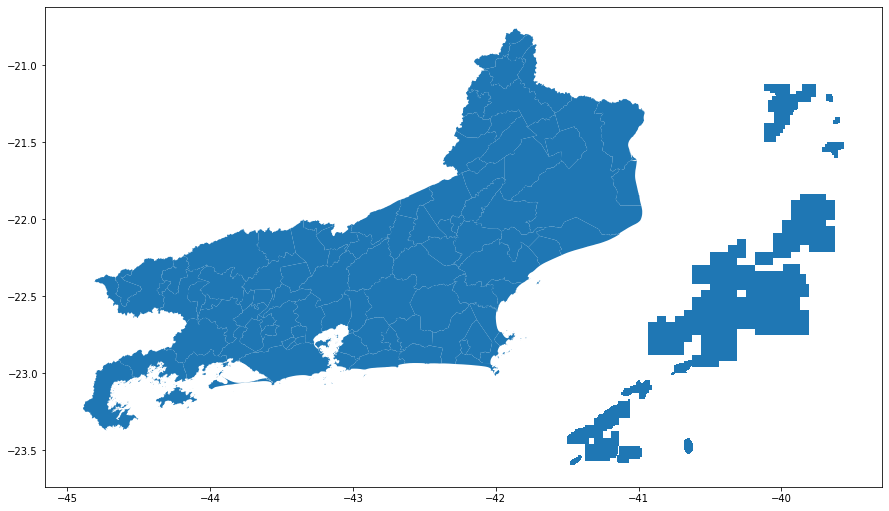

In [7]:
fig, ax = plt.subplots(figsize = (15,10))
BaciaCampos.plot(ax=ax)
RioDeJaneiro.plot(ax=ax)

plt.show()